# **Import Library**

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
#import tensorflow_hub as hub
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# **Prepare Dataset For Training**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TPATH = '/content/drive/MyDrive/CNN_Scabies_Detection/dataset/'

In [ ]:
ls $TPATH

melanoma/  nevus/  scabies/


# **Resize Image**

In [ ]:
IMAGE_SHAPE = (224, 224)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(TPATH, target_size=IMAGE_SHAPE)

Found 1200 images belonging to 3 classes.


In [ ]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 3)


In [ ]:
display(image_batch[:2])
display(label_batch[:2])

array([[[[0.67058825, 0.68235296, 0.654902  ],
         [0.6666667 , 0.6784314 , 0.6509804 ],
         [0.6784314 , 0.68235296, 0.65882355],
         ...,
         [0.68235296, 0.62352943, 0.6117647 ],
         [0.6784314 , 0.6156863 , 0.627451  ],
         [0.6745098 , 0.6156863 , 0.63529414]],

        [[0.6784314 , 0.6901961 , 0.6627451 ],
         [0.6627451 , 0.6745098 , 0.64705884],
         [0.6862745 , 0.6901961 , 0.6666667 ],
         ...,
         [0.6862745 , 0.6156863 , 0.60784316],
         [0.6784314 , 0.6156863 , 0.61960787],
         [0.67058825, 0.6117647 , 0.62352943]],

        [[0.6627451 , 0.6745098 , 0.64705884],
         [0.6627451 , 0.6745098 , 0.64705884],
         [0.6784314 , 0.68235296, 0.65882355],
         ...,
         [0.6784314 , 0.60784316, 0.6       ],
         [0.6784314 , 0.6156863 , 0.61960787],
         [0.67058825, 0.60784316, 0.6117647 ]],

        ...,

        [[0.6862745 , 0.6156863 , 0.5764706 ],
         [0.6784314 , 0.6117647 , 0.57254905]

array([[0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
print(label_batch[0:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


# **CNN LeNet MODEL**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Building a LeNet model
model = Sequential()

# First convolution layer
model.add(Conv2D(filters=128, kernel_size=(11, 11), activation='relu', input_shape=(224,224,3)))

# First pooling layer
model.add(AveragePooling2D(pool_size=(2, 2)))

# Second convolution layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))

# Second convolution layer
model.add(AveragePooling2D(pool_size=(3, 3)))

# Flatten layer
model.add(Flatten())

# First Fully connected layer
model.add(Dense(units=1024, activation='relu'))

# Second Fully connected layer
model.add(Dense(units=1024, activation='relu'))

# Fully connected layer (output layer)
model.add(Dense(units=3, activation = 'softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# print architectural models
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 214, 214, 128)     46592     
                                                                 
 average_pooling2d_4 (Avera  (None, 107, 107, 128)     0         
 gePooling2D)                                                    
                                                                 
 conv2d_10 (Conv2D)          (None, 103, 103, 256)     819456    
                                                                 
 average_pooling2d_5 (Avera  (None, 34, 34, 256)       0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 295936)            0         
                                                                 
 dense_12 (Dense)            (None, 1024)            

In [ ]:
predictions = model(image_batch)
predictions.shape

TensorShape([32, 10])

In [ ]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
    self.model.reset_metrics()

# **Training Model**

In [ ]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit(image_data, epochs=10,
                              steps_per_epoch=steps_per_epoch,
                              callbacks = [batch_stats_callback])

Epoch 1/10
38/38 [==============================] - 1642s 43s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/10
38/38 [==============================] - 1637s 43s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/10
38/38 [==============================] - 1630s 43s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/10
38/38 [==============================] - 1625s 43s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/10
38/38 [==============================] - 1624s 43s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/10
38/38 [==============================] - 1658s 44s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/10
38/38 [==============================] - 1636s 43s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/10
38/38 [==============================] - 1630s 43s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/10
38/38 [==============================] - 1633s 43s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 10/10
38/38 [

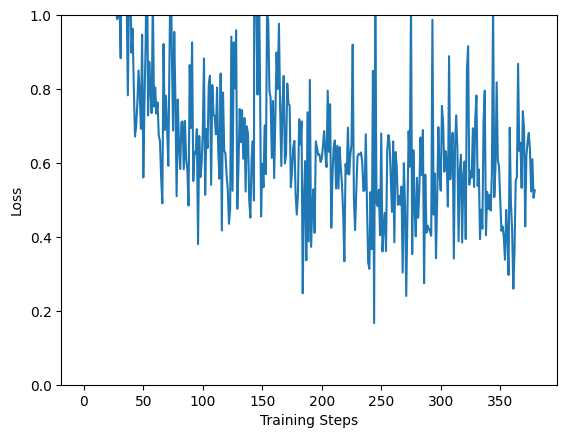

In [ ]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_losses)

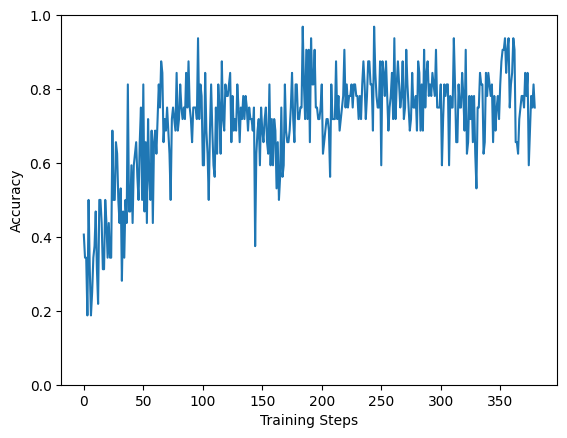

In [ ]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

In [ ]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Melanoma', 'Nevus', 'Scabies'], dtype='<U8')

In [ ]:
class_names[0]='Melanoma'
class_names[1]='Nevus'
class_names[2]='Scabies'

print(class_names)

['Melanoma' 'Nevus' 'Scabies']


In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

1/1 [==============================] - 13s 13s/step


In [ ]:
label_id = np.argmax(label_batch, axis=-1)

# **Testing Hasil Training**

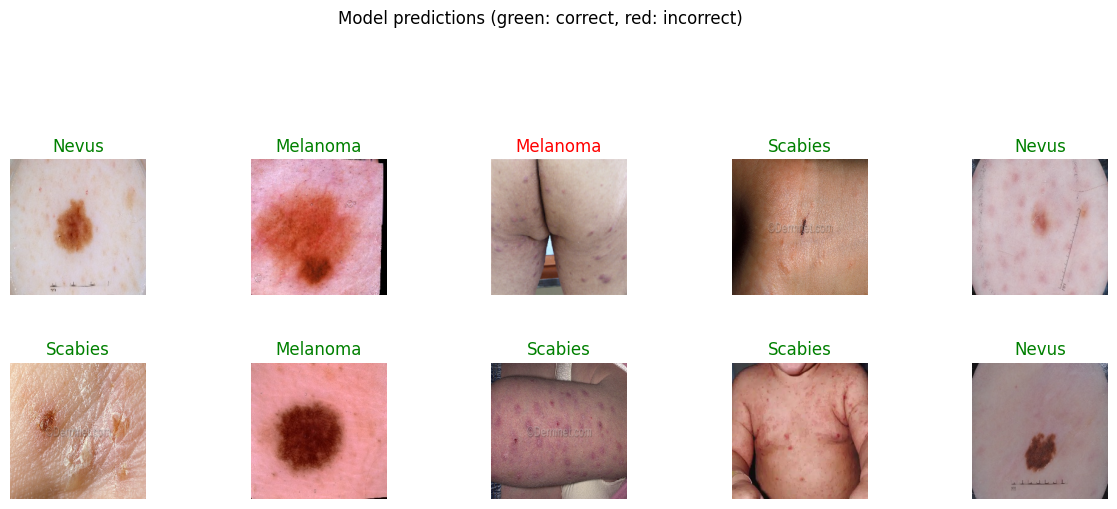

In [ ]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)
for n in range(10):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
model.save('CNN_LeNet_MODEL.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/CNN_LeNet_MODEL.h5", compile=False)

# Load the labels
class_names = open("/content/drive/MyDrive/CNN_Scabies_Detection/H5/labels.txt", "r").readlines()

# Define a function for image classification
def classify_image(image_path):
    # Create the array of the right shape to feed into the keras model
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

    # Load the image from the provided path
    image = Image.open(image_path).convert("RGB")

    # resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    # Turn the image into a numpy array
    image_array = np.asarray(image)

    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # Predicts the model
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    return class_name[2:], confidence_score


1/1 [==============================] - 0s 467ms/step


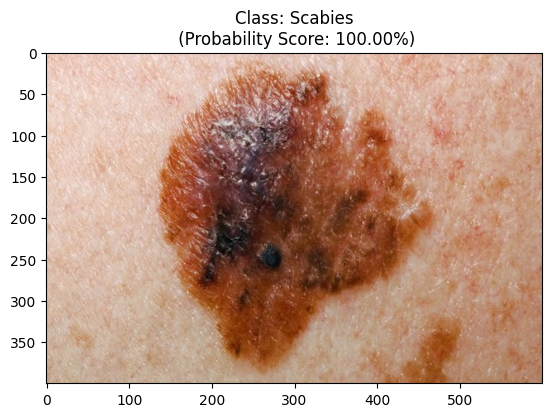

In [ ]:
# Example usage of the function
image_path = "/content/drive/MyDrive/CNN_Scabies_Detection/data_testing/tesaja.jpg" # Replace with the path to your image
class_name, confidence_score = classify_image(image_path)

# Display the image and prediction
plt.imshow(Image.open(image_path).convert("RGB"))
plt.title("Class: {} (Probability Score: {:.2%})".format(class_name, confidence_score))
plt.show()